# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [ ]:
# Details Student 1:
# Daniel Shapira 208310607
# Details Student 2:
# Daniel Papkov 211516232

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [3]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [4]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [3]:
# word net installation:

# unmark if you want to use and need to install
# pip install wn
# python -m wn download omw-he:1.4

In [5]:
# word net import:

# unmark if you want to use:
import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [5]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# pip install hebrew_tokenizer

In [6]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

d:\Git\NLP-Project


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [7]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [4]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [5]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

In [29]:

final_stories =[] ## this will be the final list of stories that are in hebrew
for story in df_train.story:
    tokens=ht.tokenize(story)
    hebrew_words=[] ## list of the words in hebrew after filtered
    for _type,token,_ ,_  in tokens:## we dont need _1 and _2 they are just place holders
        if(_type=="HEBREW"):
            hebrew_words.append(token)
    single_story_in_hebrew = " ".join(hebrew_words)## add all the words in the order they apeard back such that they are seperated by space
    final_stories.append(single_story_in_hebrew) ## add each story back to the dataframe 
    ##print (single_story_in_hebrew)


In [65]:
# # Define the percentage of data for evaluation (10%)
# eval_percentage = 0.1
# eval_size = int(eval_percentage * len(df_train))

# # Evaluate F1-score for different chunks of data
# best_f1_score = 0.0
# best_data_chunk = None

# for i in range(0, len(df_train), eval_size):
#     data_chunk = df_train.iloc[i:i+eval_size]
    
#     # Evaluate F1-score for this chunk
#     y = data_chunk['gender']
#     y_pred_random = y.sample(frac=1, random_state=0)  # Random baseline
#     chunk_f1_score = f1_score(y, y_pred_random, average='weighted')
    
#     if chunk_f1_score > best_f1_score:
#         best_f1_score = chunk_f1_score
#         best_data_chunk = data_chunk

# print(f"Best data chunk with F1-score: {best_f1_score}")

# # Now you can use the best_data_chunk for training models
# print("Best data chunk:")
# print(best_data_chunk)

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(final_stories, df_train['gender'], test_size=0.2, random_state=42)
# Training KNN models with n_neighbors values of 1 and 3 using TfidfVectorizer and CountVectorizer
vectorizers = [TfidfVectorizer(max_features = 1000), CountVectorizer(max_features = 1000)]
vectorizer_names = ['TfidfVectorizer', 'CountVectorizer']
n_neighbors_values = [1, 3]

for vectorizer, vectorizer_name in zip(vectorizers, vectorizer_names):
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    for n_neighbors in n_neighbors_values:
        knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn_model.fit(X_train_vectorized, y_train)
        y_pred = knn_model.predict(X_test_vectorized)
        knn_f1_score = f1_score(y_test, y_pred, average='weighted')

        print(f"F1-score for KNN with n_neighbors={n_neighbors} using {vectorizer_name}: {knn_f1_score}")

KNeighborsClassifier(n_neighbors=1)

F1-score for KNN with n_neighbors=1 using TfidfVectorizer: 0.68080392910443


KNeighborsClassifier(n_neighbors=3)

F1-score for KNN with n_neighbors=3 using TfidfVectorizer: 0.6708237423014561


KNeighborsClassifier(n_neighbors=1)

F1-score for KNN with n_neighbors=1 using CountVectorizer: 0.6291390728476821


KNeighborsClassifier(n_neighbors=3)

F1-score for KNN with n_neighbors=3 using CountVectorizer: 0.6288619460010189


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(final_stories, df_train['gender'], test_size=0.2, random_state=42)
n_clusters_values = [2, 3, 4, 5]

for vectorizer, vectorizer_name in zip(vectorizers, vectorizer_names):
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    for n_clusters in n_clusters_values:
        kmeans_model = KMeans(n_clusters=n_clusters, random_state=0)
        kmeans_model.fit(X_train_vectorized)
        cluster_labels = kmeans_model.predict(X_test_vectorized)
        
        # Convert cluster labels to original class labels
        cluster_labels_mapped = ['f' if label == 0 else 'm' for label in cluster_labels]

        kmeans_f1_score = f1_score(y_test, cluster_labels_mapped, average='weighted')

        print(f"F1-score for KMeans with n_clusters={n_clusters} using {vectorizer_name}: {kmeans_f1_score}")

KMeans(n_clusters=2, random_state=0)

F1-score for KMeans with n_clusters=2 using TfidfVectorizer: 0.5067642041433562


KMeans(n_clusters=3, random_state=0)

F1-score for KMeans with n_clusters=3 using TfidfVectorizer: 0.5864795822195572


KMeans(n_clusters=4, random_state=0)

F1-score for KMeans with n_clusters=4 using TfidfVectorizer: 0.6353714731304038


KMeans(n_clusters=5, random_state=0)

F1-score for KMeans with n_clusters=5 using TfidfVectorizer: 0.628440035255809


KMeans(n_clusters=2, random_state=0)

F1-score for KMeans with n_clusters=2 using CountVectorizer: 0.5625225551201908


KMeans(n_clusters=3, random_state=0)

F1-score for KMeans with n_clusters=3 using CountVectorizer: 0.6119269925445078


KMeans(n_clusters=4, random_state=0)

F1-score for KMeans with n_clusters=4 using CountVectorizer: 0.5962660408024646


KMeans(n_clusters=5, random_state=0)

F1-score for KMeans with n_clusters=5 using CountVectorizer: 0.5988578558402919


#### Lets Create a short function to represent how good the model classifies our stories in a ConfusionMatrix ####

In [32]:
def plot_confusion_matrix(Y_test, y_pred, labels=['Male', 'Female']):
    conf_matrix = confusion_matrix(Y_test, y_pred)
    outcomes = ['Correct', 'Incorrect']
    conf_matrix_labels = [[f"{label} {outcome} ({count})" for outcome, count in zip(outcomes, row)] for label, row in zip(labels, conf_matrix)]
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=conf_matrix_labels, fmt="", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

#### Checking Perceptron with TfidfVectorizer ####

Perceptron()

F1 Score: 0.7783


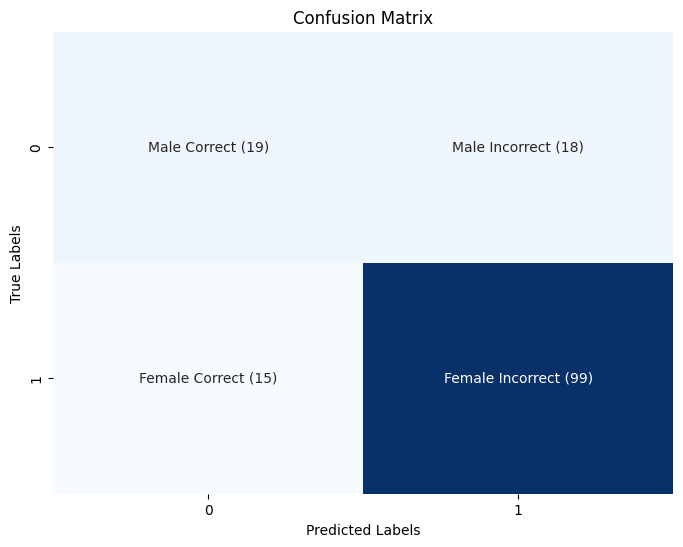

Top 20 words:
לאחר: 1.3610
שעות: 1.3436
בגלל: 1.2944
אשתי: 1.2923
עקב: 1.2913
זוכר: 1.2681
כמה: 1.2496
אני: 1.2449
אם: 1.2145
התחיל: 1.1965
לכל: 1.1682
אוהב: 1.1637
מדובר: 1.1604
עליתי: 1.1251
רכב: 1.1241
למה: 1.1072
מגיע: 1.1013
איזה: 1.0978
הרי: 1.0934
בת: 1.0808

Bottom 20 words:
נשאר: -1.0909
נחמד: -1.0953
ולא: -1.1028
אבל: -1.1129
עובדים: -1.1180
יהיה: -1.1380
שום: -1.1537
שמדובר: -1.1666
עוד: -1.1721
חדשים: -1.1769
בסדר: -1.1891
בן: -1.2136
חברה: -1.2421
חשבתי: -1.3256
שלו: -1.3601
הציוד: -1.3992
יכולה: -1.4735
היינו: -1.7499
צריכה: -1.7819
יודעת: -2.1292


<Figure size 1000x600 with 0 Axes>

(array([ 1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  2.,  1.,
         6.,  8.,  4.,  6.,  9.,  9.,  9., 19., 24., 21., 37., 35., 39.,
        42., 50., 49., 57., 61., 62., 54., 51., 48., 53., 36., 46., 25.,
        30., 24., 19., 15., 10., 11.,  4.,  6.,  5.,  3.,  5.]),
 array([-2.12922371, -2.05941857, -1.98961344, -1.9198083 , -1.85000317,
        -1.78019803, -1.7103929 , -1.64058776, -1.57078263, -1.5009775 ,
        -1.43117236, -1.36136723, -1.29156209, -1.22175696, -1.15195182,
        -1.08214669, -1.01234155, -0.94253642, -0.87273129, -0.80292615,
        -0.73312102, -0.66331588, -0.59351075, -0.52370561, -0.45390048,
        -0.38409534, -0.31429021, -0.24448508, -0.17467994, -0.10487481,
        -0.03506967,  0.03473546,  0.1045406 ,  0.17434573,  0.24415087,
         0.313956  ,  0.38376113,  0.45356627,  0.5233714 ,  0.59317654,
         0.66298167,  0.73278681,  0.80259194,  0.87239708,  0.94220221,
         1.01200734,  1.08181248,  1.15161761,  1.22142275,

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Feature Weights')

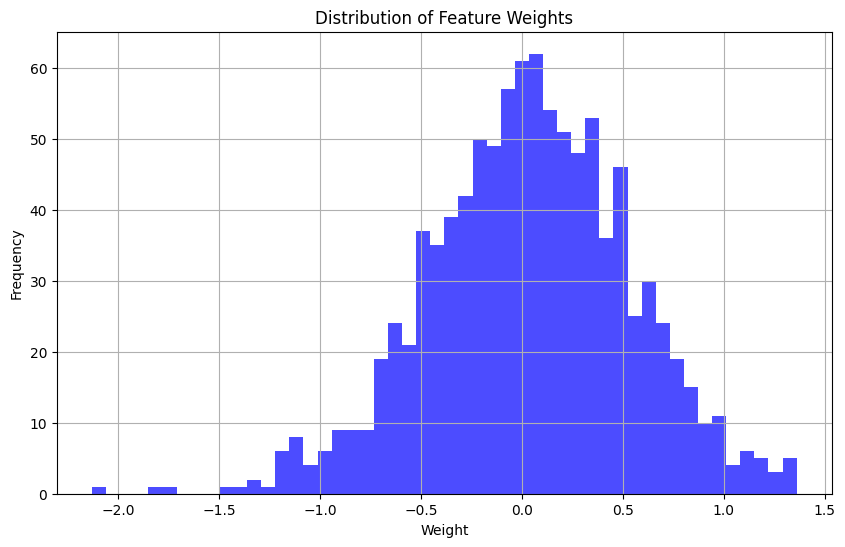

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(final_stories, df_train['gender'], test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Fit and transform on the training data
x_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
x_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the Perceptron model
perc = Perceptron()
perc.fit(x_train_tfidf, Y_train)

# Predict on the test data
y_pred = perc.predict(x_test_tfidf)

# Create a DataFrame to compare predictions with actual results
df_temp = pd.DataFrame({"prediction": y_pred, "actual_res": Y_test})

# Calculate F1 score
f1 = f1_score(Y_test, y_pred, average='weighted')  # You can change 'weighted' to other options if needed

print(f"F1 Score: {f1:.4f}")

plot_confusion_matrix(Y_test,y_pred)

feature_names = vectorizer.get_feature_names_out()

# Get the coefficients of the Perceptron model
coefficients = perc.coef_

# Combine feature names and coefficients into a dictionary
features_coefficients = dict(zip(feature_names, coefficients[0]))

# Sort the dictionary by coefficient value (weight)
sorted_features = sorted(features_coefficients.items(), key=lambda x: x[1], reverse=True)

# Print top 10 words
print("Top 20 words:")
for feature, coefficient in sorted_features[:20]:
    print(f"{feature}: {coefficient:.4f}")

# Print bottom 10 words
print("\nBottom 20 words:")
for feature, coefficient in sorted_features[-20:]:
    print(f"{feature}: {coefficient:.4f}")


plt.figure(figsize=(10, 6))
plt.hist(coefficients[0], bins=50, color='blue', alpha=0.7)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Feature Weights')
plt.grid(True)
plt.show()

#### Checking Perceptron with CountVectorizer ####

Perceptron()

F1 Score: 0.7374


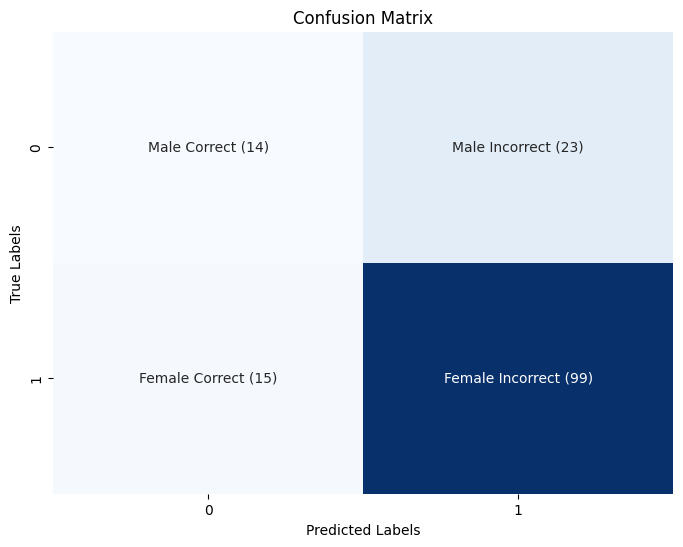

Top 20 words:
למה: 55.0000
שעות: 53.0000
החברים: 50.0000
צריך: 46.0000
אם: 45.0000
עקב: 44.0000
התחיל: 42.0000
אדם: 41.0000
חבר: 41.0000
מספר: 41.0000
בגלל: 40.0000
בכל: 40.0000
יכול: 40.0000
קרה: 40.0000
זוכר: 37.0000
לאחר: 37.0000
אוהב: 36.0000
ביותר: 36.0000
חברים: 36.0000
יודע: 36.0000

Bottom 20 words:
אבל: -37.0000
חשבתי: -37.0000
שלו: -37.0000
עובדים: -38.0000
ראש: -39.0000
חברות: -40.0000
יהיה: -40.0000
ים: -40.0000
האוטו: -41.0000
פעמים: -41.0000
שום: -42.0000
אליה: -43.0000
הציוד: -43.0000
אחת: -45.0000
היינו: -48.0000
יודעת: -53.0000
עוד: -53.0000
הקורונה: -54.0000
יכולה: -58.0000
צריכה: -61.0000


<Figure size 1000x600 with 0 Axes>

(array([ 1.,  1.,  0.,  3.,  0.,  1.,  1.,  2.,  3.,  5.,  6.,  5., 11.,
         8.,  8., 22., 11., 18., 33., 26., 19., 57., 49., 42., 53., 66.,
        48., 44., 66., 46., 47., 74., 38., 32., 42., 26., 16., 16., 13.,
        12.,  8.,  5.,  2.,  7.,  1.,  2.,  1.,  1.,  0.,  2.]),
 array([-61.  , -58.68, -56.36, -54.04, -51.72, -49.4 , -47.08, -44.76,
        -42.44, -40.12, -37.8 , -35.48, -33.16, -30.84, -28.52, -26.2 ,
        -23.88, -21.56, -19.24, -16.92, -14.6 , -12.28,  -9.96,  -7.64,
         -5.32,  -3.  ,  -0.68,   1.64,   3.96,   6.28,   8.6 ,  10.92,
         13.24,  15.56,  17.88,  20.2 ,  22.52,  24.84,  27.16,  29.48,
         31.8 ,  34.12,  36.44,  38.76,  41.08,  43.4 ,  45.72,  48.04,
         50.36,  52.68,  55.  ]),
 <BarContainer object of 50 artists>)

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Feature Weights')

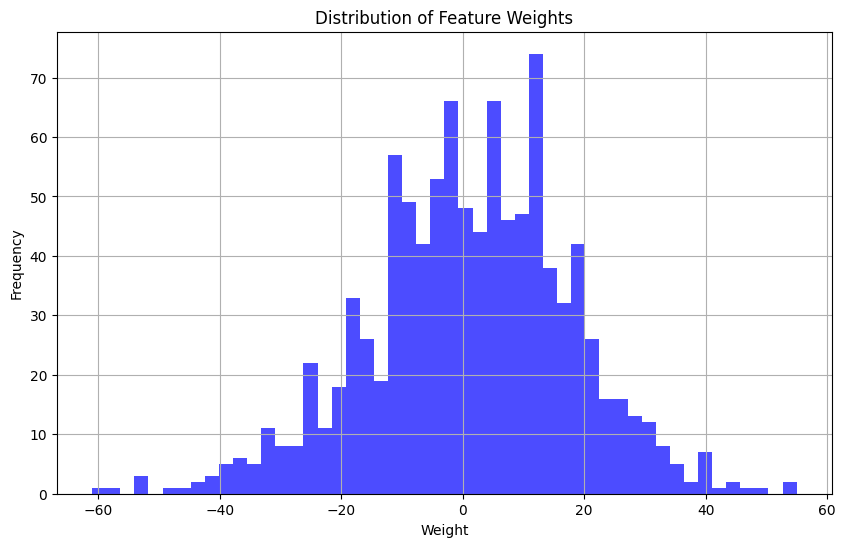

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(final_stories, df_train['gender'], test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
vectorizer = CountVectorizer(max_features=1000)  # Adjust max_features as needed

# Fit and transform on the training data
x_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
x_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the Perceptron model
perc = Perceptron()
perc.fit(x_train_tfidf, Y_train)

# Predict on the test data
y_pred = perc.predict(x_test_tfidf)

# Create a DataFrame to compare predictions with actual results
df_temp = pd.DataFrame({"prediction": y_pred, "actual_res": Y_test})

# Calculate F1 score
f1 = f1_score(Y_test, y_pred, average='weighted')  # You can change 'weighted' to other options if needed

print(f"F1 Score: {f1:.4f}")

plot_confusion_matrix(Y_test,y_pred)

feature_names = vectorizer.get_feature_names_out()

# Get the coefficients of the Perceptron model
coefficients = perc.coef_

# Combine feature names and coefficients into a dictionary
features_coefficients = dict(zip(feature_names, coefficients[0]))

# Sort the dictionary by coefficient value (weight)
sorted_features = sorted(features_coefficients.items(), key=lambda x: x[1], reverse=True)

# Print top 10 words
print("Top 20 words:")
for feature, coefficient in sorted_features[:20]:
    print(f"{feature}: {coefficient:.4f}")

# Print bottom 10 words
print("\nBottom 20 words:")
for feature, coefficient in sorted_features[-20:]:
    print(f"{feature}: {coefficient:.4f}")


plt.figure(figsize=(10, 6))
plt.hist(coefficients[0], bins=50, color='blue', alpha=0.7)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Feature Weights')
plt.grid(True)
plt.show()

### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [ ]:
df_predicted.to_csv('classification_results.csv',index=False)